# Importando a Biblioteca


In [89]:

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import squarify 
import os
import numpy as np
import matplotlib.ticker as mticker
import seaborn as sns
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__) 
print("Seaborn version:", sns.__version__)
print("Bibliotecas instaladas com sucesso no ambiente virtual!")

Pandas version: 2.3.1
Matplotlib version: 3.10.3
Seaborn version: 0.13.2
Bibliotecas instaladas com sucesso no ambiente virtual!


## Importando DataFrames 

In [63]:

try:
    americanas = pd.read_csv("zProjeto_Final/Datasets/Americanas.csv", sep=',', encoding='utf-8')
    comercio = pd.read_csv("zProjeto_Final/Datasets/Comercio.csv", sep=',', encoding='utf-8')
    economia = pd.read_csv("zProjeto_Final/Datasets/dados_economicos.csv", sep=',', encoding='utf-8')
    exportacao = pd.read_csv("zProjeto_Final/Datasets/Exportacao.csv", sep=',', encoding='utf-8')
    importacao = pd.read_csv("zProjeto_Final/Datasets/Importacao.csv", sep=',', encoding='utf-8')
    producao = pd.read_csv("zProjeto_Final/Datasets/Producao.csv", sep=',', encoding='utf-8')
    clima = pd.read_csv("zProjeto_Final/Datasets/resumo_climatico.csv", sep=',', encoding='utf-8')
    semclass = pd.read_csv("zProjeto_Final/Datasets/Sem_Classificacao.csv", sep=',', encoding='utf-8')
    vinifera = pd.read_csv("zProjeto_Final/Datasets/Viniferas.csv", sep=',', encoding='utf-8')
    exportador_mundial = pd.read_csv("zProjeto_Final/Datasets/vinho_mundial_exportacao.csv", sep=';', encoding='utf-8')
    consumidor_mundial = pd.read_csv("zProjeto_Final/Datasets/consumidores_mundial.csv", sep=';', encoding='utf-8')

    print(" Todos os arquivos foram lidos com sucesso!")

except FileNotFoundError as e:
    print(f" Erro: O arquivo não foi encontrado. Verifique o caminho: {e}")
except Exception as e:
    print(f" Ocorreu um erro ao ler um dos arquivos: {e}")

 Todos os arquivos foram lidos com sucesso!


### Todos os CSV já foram Manipulados e agora Importados, vamos começar a gerar os relatórios

# Grafico com os maiores exportadores de Vinho Mundial
Arquivo gerado através da prospecção de dados de International Organisation of Vine and Wine: https://www.oiv.int/what-we-do/statistics 

Iniciando a geração do gráfico...


C:\Users\zirn\AppData\Local\Temp\ipykernel_24428\1246139346.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


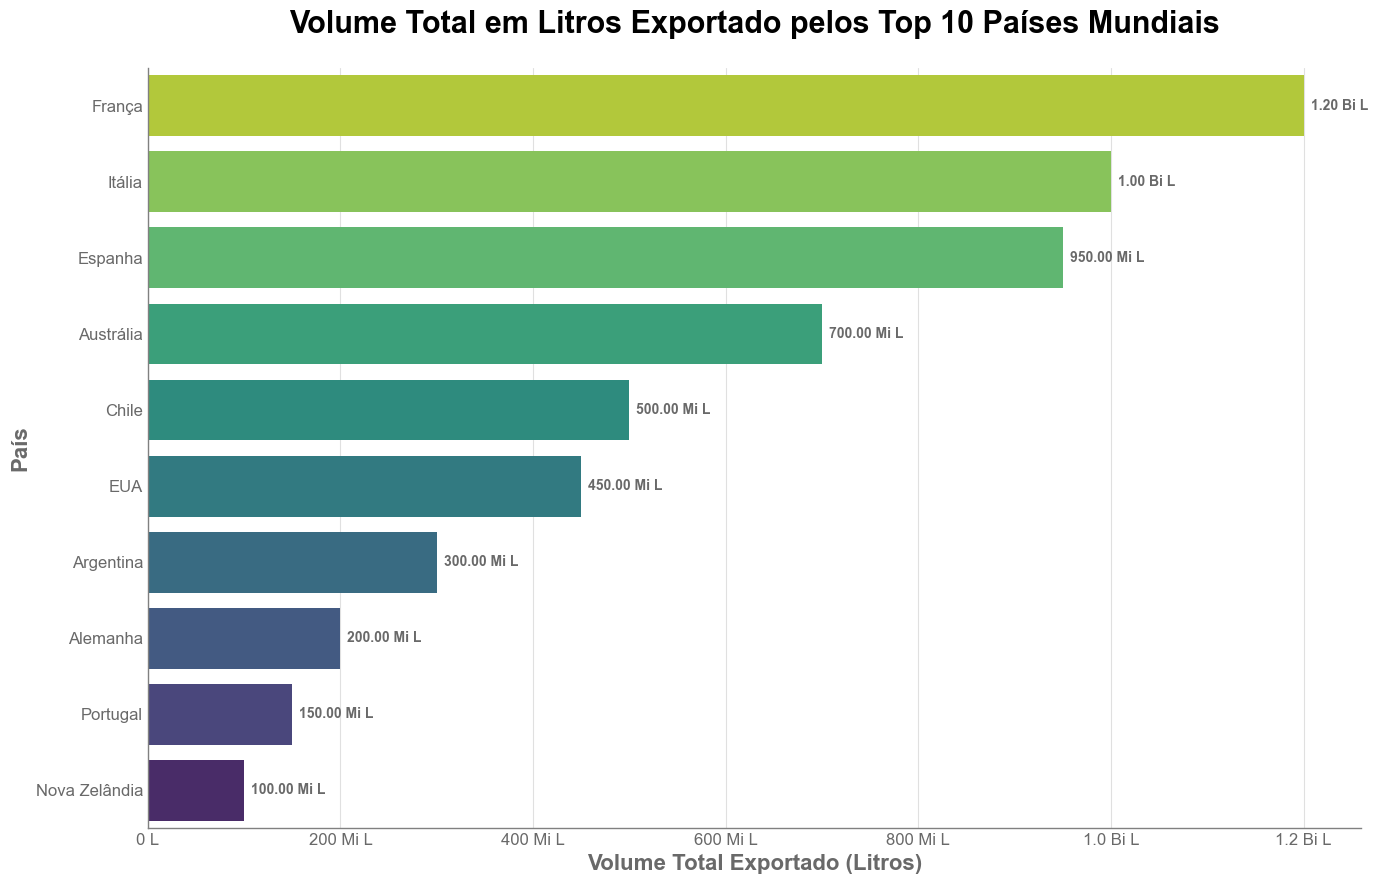


✅ Gráfico de Top Exportadores Mundiais gerado com sucesso com fundo BRANCO e ordem DECRESCENTE!


In [ ]:


# --- Configurações Iniciais do Matplotlib para Estilo Profissional (Fundo BRANCO) ---
plt.style.use('seaborn-v0_8-whitegrid') # Fundo branco com grade sutil

plt.rcParams['figure.figsize'] = (16, 10) # Tamanho padrão da figura
plt.rcParams['font.size'] = 12 # Tamanho de fonte padrão
plt.rcParams['axes.labelsize'] = 14 # Tamanho dos rótulos dos eixos
plt.rcParams['axes.titlesize'] = 18 # Tamanho dos títulos dos subplots

# Ajustar a cor do texto e elementos para ser visível no fundo CLARO
plt.rcParams['text.color'] = 'dimgray' # Cor padrão do texto (cinza escuro)
plt.rcParams['axes.labelcolor'] = 'dimgray' # Cor dos rótulos dos eixos
plt.rcParams['xtick.color'] = 'dimgray' # Cor dos ticks do eixo X
plt.rcParams['ytick.color'] = 'dimgray' # Cor dos ticks do eixo Y
plt.rcParams['axes.edgecolor'] = 'gray' # Borda dos eixos
plt.rcParams['grid.color'] = 'lightgray' # Cor da grade (mais suave)
plt.rcParams['grid.linestyle'] = '-' # Estilo da grade

print("Iniciando a geração do gráfico...")


if 'exportador_mundial' in locals() and not exportador_mundial.empty:
    if all(col in exportador_mundial.columns for col in ['Regiao/Pais', 'Ano', 'Produto', 'Quantidade (litros)']):

        # Filtrar para 'Vinho' e remover NaNs/zeros
        df_vinho_export = exportador_mundial[exportador_mundial['Produto'] == 'Vinho'].copy()
        df_vinho_export = df_vinho_export[
            (df_vinho_export['Quantidade (litros)'].notna()) &
            (df_vinho_export['Quantidade (litros)'] != 0)
        ].copy()

        if df_vinho_export.empty:
            print("❌ O DataFrame de exportadores de vinho está vazio após as salvaguardas de filtragem. Não é possível gerar o gráfico.")
        else:
            # 1. Preparar dados: Total Exportado pelos Top Países
            total_exportado_por_pais = df_vinho_export.groupby('Regiao/Pais')['Quantidade (litros)'].sum().reset_index()

            top_n = 10 # Definir o número de top exportadores
            # ORDENAR DO MAIOR PARA O MENOR (decrescente) antes de plotar
            top_exportadores_total = total_exportado_por_pais.nlargest(top_n, 'Quantidade (litros)').sort_values(by='Quantidade (litros)', ascending=False) 

            # 2. Criar o Gráfico de Barras HORIZONTAIS com Seaborn
            plt.figure(figsize=(14, 9)) # Ajusta o tamanho da figura
            ax = sns.barplot(
                x='Quantidade (litros)',
                y='Regiao/Pais',
                data=top_exportadores_total,
                palette='viridis_r', # Paleta de cores moderna INVERSA (verdes/amarelos no fundo claro)
                ax=plt.gca() # Garante que o seaborn desenhe no eixo atual do matplotlib
            )

            # 3. Adicionar Título e Rótulos Aprimorados
            plt.title(f'Volume Total em Litros Exportado pelos Top {top_n} Países Mundiais', fontsize=22, fontweight='bold', color='black', pad=25) # Título preto no fundo branco
            plt.xlabel('Volume Total Exportado (Litros)', fontsize=16, fontweight='semibold', color='dimgray')
            plt.ylabel('País', fontsize=16, fontweight='semibold', color='dimgray')

            # 4. Formatação do Eixo X (Volume)
            def format_volume_labels(value, pos):
                if value >= 1_000_000_000:
                    return f'{value / 1_000_000_000:.1f} Bi L'
                elif value >= 1_000_000:
                    return f'{value / 1_000_000:.0f} Mi L'
                else:
                    return f'{value:,.0f} L'
            
            formatter_volume = plt.FuncFormatter(format_volume_labels)
            ax.xaxis.set_major_formatter(formatter_volume)
            ax.tick_params(axis='x', labelsize=12, colors='dimgray')
            ax.tick_params(axis='y', labelsize=12, colors='dimgray', length=0) # Remove ticks do Y


            # 5. Adicionar os valores exatos no final de cada barra com formatação
            for p in ax.patches:
                value = p.get_width()
                
                if value >= 1_000_000_000:
                    text_label = f'{value / 1_000_000_000:.2f} Bi L' 
                elif value >= 1_000_000:
                    text_label = f'{value / 1_000_000:.2f} Mi L' 
                else:
                    text_label = f'{value:,.0f} L'

                ax.annotate(text_label,
                            (value, p.get_y() + p.get_height() / 2),
                            ha='left', va='center',
                            xytext=(5, 0), # Pequeno offset para o texto não colar na barra
                            textcoords='offset points',
                            fontsize=10, color='dimgray', fontweight='bold') # Texto dos rótulos em dimgray

            # 6. Remover bordas desnecessárias e ajustar grid
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_color('gray')
            ax.spines['left'].set_color('gray')
            ax.xaxis.grid(True, linestyle='-', alpha=0.7, color='lightgray') # Grid horizontal no X
            ax.yaxis.grid(False) # Sem grid vertical no Y para não cortar nomes

            plt.tight_layout() # Ajusta o layout para evitar cortes
            plt.show()

            print(f"\n✅ Gráfico de Top Exportadores Mundiais gerado com sucesso com fundo BRANCO e ordem DECRESCENTE!")

    else:
        print("❌ ERRO: O DataFrame 'exportador_mundial' não contém todas as colunas esperadas para o gráfico ('Regiao/Pais', 'Ano', 'Produto', 'Quantidade (litros)').")
else:
    print("❌ ERRO: O DataFrame 'exportador_mundial' não foi carregado ou está vazio. Por favor, verifique a célula de importação inicial.")

## Paises que mais consomem Vinho no Mundo:

Iniciando a geração do gráfico de mapa de árvore (treemap) para os maiores CONSUMIDORES mundiais de vinho, com países traduzidos...
✅ Nomes dos países na coluna 'Regiao/Pais' traduzidos para o treemap.


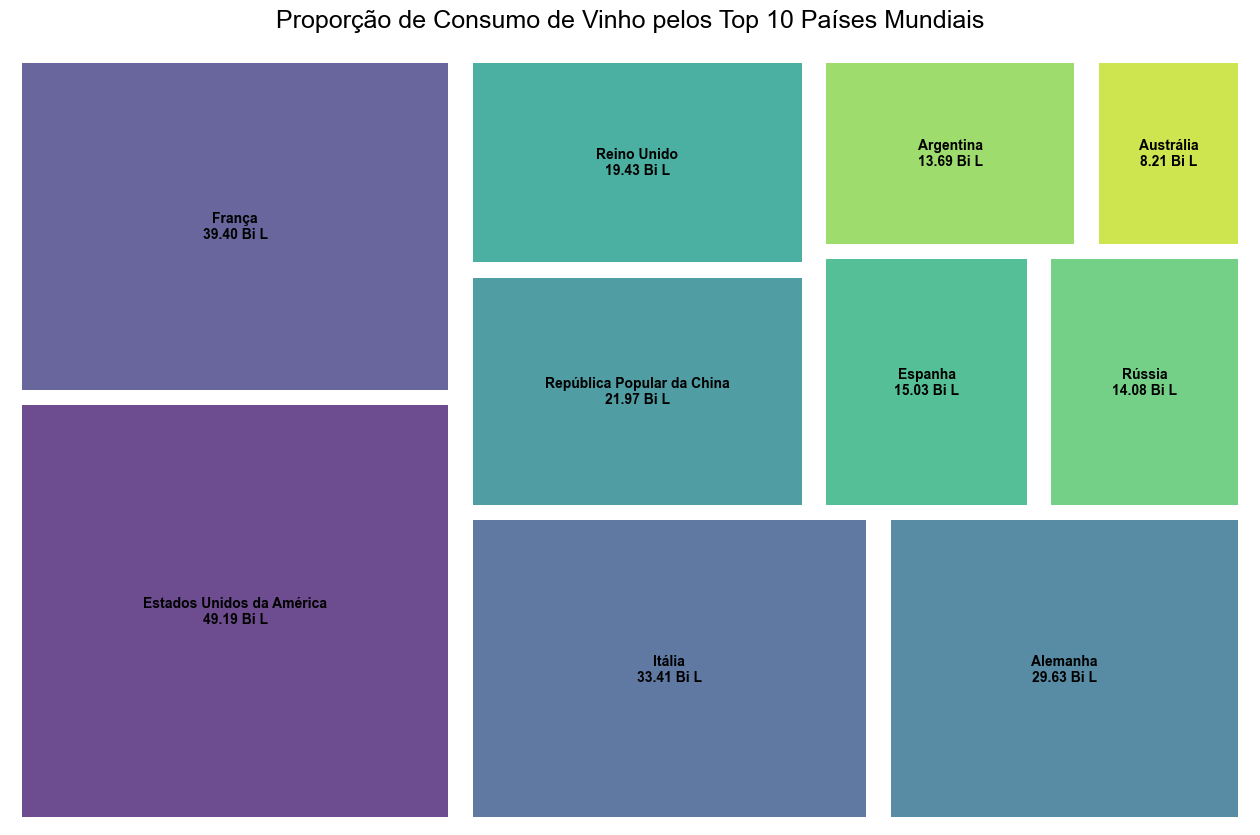


🎉 Gráfico de Mapa de Árvore (Treemap) dos Top 10 Maiores CONSUMIDORES Mundiais de Vinho gerado com sucesso com fundo BRANCO!


In [ ]:

# --- Configurações de Estilo para os Gráficos (Fundo BRANCO) ---
# Remover plt.style.use('dark_background') para usar o fundo padrão (branco) ou 'seaborn-whitegrid'.
plt.style.use('seaborn-v0_8-whitegrid') # Estilo com fundo branco e grade leve

plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 12 # Ajustar para treemap
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 18

# Ajustar a cor do texto e elementos para ser visível no fundo CLARO
plt.rcParams['text.color'] = 'dimgray' # Texto geral em cinza escuro
plt.rcParams['axes.labelcolor'] = 'dimgray' # Rótulos dos eixos em cinza escuro
plt.rcParams['xtick.color'] = 'dimgray' # Ticks do eixo X em cinza escuro
plt.rcParams['ytick.color'] = 'dimgray' # Ticks do eixo Y em cinza escuro
plt.rcParams['axes.edgecolor'] = 'gray' # Borda dos eixos em cinza
plt.rcParams['grid.color'] = 'lightgray' # Grade em cinza claro


# --- Mapeamento de Tradução de Países (Mantido) ---
country_translation_map = {
    'World': 'Mundo',
    'European Union': 'União Europeia',
    'France': 'França',
    'Italy': 'Itália',
    'Spain': 'Espanha',
    'Chile': 'Chile',
    'Australia': 'Austrália',
    'Germany': 'Alemanha',
    'United States': 'Estados Unidos',
    'United States of America': 'Estados Unidos da América', 
    'New Zealand': 'Nova Zelândia',
    'Portugal': 'Portugal',
    'South Africa': 'África do Sul',
    'Argentina': 'Argentina',
    'China': 'China',
    "People's Republic of China": "República Popular da China", 
    'United Kingdom': 'Reino Unido',
    'Canada': 'Canadá',
    'Netherlands': 'Holanda',
    'Belgium': 'Bélgica',
    'Austria': 'Áustria',
    'Greece': 'Grécia',
    'Hungary': 'Hungria',
    'Switzerland': 'Suíça',
    'Russia': 'Rússia',
    'Japan': 'Japão',
    'Brazil': 'Brasil',
    'Mexico': 'México',
    'Sweden': 'Suécia',
    'Denmark': 'Dinamarca',
    'Ireland': 'Irlanda',
    'Finland': 'Finlândia',
    'Norway': 'Noruega',
    'Poland': 'Polônia',
    'Czech Republic': 'República Tcheca',
    'Slovakia': 'Eslováquia',
    'Romania': 'Romênia',
    'Bulgaria': 'Bulgária',
    'Croatia': 'Croácia',
    'Slovenia': 'Eslovênia',
    'Serbia': 'Sérvia',
    'Ukraine': 'Ucrânia',
    'Moldova': 'Moldávia',
    'Georgia': 'Geórgia',
    'Turkey': 'Turquia',
    'Israel': 'Israel',
    'Lebanon': 'Líbano',
    'Syria': 'Síria',
    'Egypt': 'Egito',
    'Algeria': 'Argélia',
    'Morocco': 'Marrocos',
    'Tunisia': 'Tunísia',
    'India': 'Índia',
    'Indonesia': 'Indonésia',
    'Philippines': 'Filipinas',
    'South Korea': 'Coreia do Sul',
    'Thailand': 'Tailândia',
    'Vietnam': 'Vietnã',
    'Malaysia': 'Malásia',
    'Singapore': 'Singapura',
    'Hong Kong': 'Hong Kong',
    'Taiwan': 'Taiwan',
    'United Arab Emirates': 'Emirados Árabes Unidos',
    'Saudi Arabia': 'Arábia Saudita',
    'Qatar': 'Catar',
    'Kuwait': 'Kuwait',
    'Nigeria': 'Nigéria',
    'Kenya': 'Quênia',
    'Ethiopia': 'Etiópia',
    'Tanzania': 'Tanzânia',
    'Uganda': 'Uganda',
    'Ghana': 'Gana',
    'Colombia': 'Colômbia',
    'Peru': 'Peru',
    'Venezuela': 'Venezuela',
    'Ecuador': 'Equador',
    'Bolivia': 'Bolívia',
    'Paraguay': 'Paraguai',
    'Uruguay': 'Uruguai',
    'Cuba': 'Cuba',
    'Dominican Republic': 'República Dominicana',
    'Puerto Rico': 'Porto Rico',
    'Jamaica': 'Jamaica',
    'Trinidad and Tobago': 'Trinidad e Tobago',
    'Iceland': 'Islândia',
    'Luxembourg': 'Luxemburgo',
    'Malta': 'Malta',
    'Cyprus': 'Chipre',
    'Albania': 'Albânia',
    'Bosnia and Herzegovina': 'Bósnia e Herzegovina',
    'North Macedonia': 'Macedônia do Norte',
    'Montenegro': 'Montenegro',
    'Kosovo': 'Kosovo',
    'Lithuania': 'Lituânia',
    'Latvia': 'Letônia',
    'Estonia': 'Estônia',
    'Belarus': 'Belarus',
    'Azerbaijan': 'Azerbaijão',
    'Kazakhstan': 'Cazaquistão',
    'Uzbekistan': 'Uzbequistão',
    'Afghanistan': 'Afeganistão',
    'Republic of Turkiye': 'Turquia',
    'Republic of North Macenoia': 'Macedônia do Norte',
    'new zealand': 'Nova Zelândia',
    'Republic of Türkiye': 'Turquia',
    'reublic of north macenoia': 'Macedônia do Norte',
    'Belarus' : 'Bielorrússia'
}


print("Iniciando a geração do gráfico de mapa de árvore (treemap) para os maiores CONSUMIDORES mundiais de vinho, com países traduzidos...")

# Verificar se o DataFrame 'consumidor_mundial' existe e contém as colunas esperadas
if 'consumidor_mundial' in locals() and not consumidor_mundial.empty:
    # Criar uma cópia para as transformações do gráfico
    df_para_treemap = consumidor_mundial.copy()

    # *** Aplicar a tradução dos nomes dos países aqui ***
    if 'Regiao/Pais' in df_para_treemap.columns:
        df_para_treemap['Regiao/Pais'] = df_para_treemap['Regiao/Pais'].replace(country_translation_map)
        print("✅ Nomes dos países na coluna 'Regiao/Pais' traduzidos para o treemap.")
    else:
        print("❌ ERRO: Coluna 'Regiao/Pais' não encontrada para tradução de países no treemap.")


    # Salvaguardas finais 
    df_vinho_consumo_filtrado = df_para_treemap[df_para_treemap['Produto'] == 'Vinho'].copy()
    df_vinho_consumo_filtrado = df_vinho_consumo_filtrado[
        (df_vinho_consumo_filtrado['Quantidade (litros)'].notna()) &
        (df_vinho_consumo_filtrado['Quantidade (litros)'] != 0)
    ].copy()

    if df_vinho_consumo_filtrado.empty:
        print("❌ O DataFrame 'consumidor_mundial' está vazio após as salvaguardas de filtragem para vinho/quantidades válidas. Não é possível gerar o treemap.")
    else:
        # 1. Preparar dados para o Treemap: Total Consumido pelos Top Países
        total_consumido_por_pais = df_vinho_consumo_filtrado.groupby('Regiao/Pais')['Quantidade (litros)'].sum().reset_index()

        top_n = 10 # Definir o número de top consumidores para o treemap
        top_consumidores_treemap = total_consumido_por_pais.nlargest(top_n, 'Quantidade (litros)')

        # Gerar rótulos personalizados para o treemap: País e Quantidade
        labels = []
        for index, row in top_consumidores_treemap.iterrows():
            country = row['Regiao/Pais']
            value = row['Quantidade (litros)']
            if value >= 1_000_000_000:
                labels.append(f'{country}\n{value / 1_000_000_000:.2f} Bi L')
            elif value >= 1_000_000:
                labels.append(f'{country}\n{value / 1_000_000:.0f} Mi L')
            else:
                labels.append(f'{country}\n{value:,.0f} L')

        sizes = top_consumidores_treemap['Quantidade (litros)'].tolist()
        # Usar uma paleta de cores adequada para fundo CLARO, como 'viridis' ou 'crest'
        # 'viridis' (tons de azul-verde) ou 'YlGnBu' (amarelo-verde-azul) são boas opções para caixas no fundo branco
        colors = sns.color_palette('viridis', n_colors=len(sizes)).as_hex() 


        # 2. Criar o Treemap
        plt.figure(figsize=(16, 10))
        squarify.plot(
            sizes=sizes,
            label=labels,
            color=colors,
            alpha=0.8,
            pad=True,
            text_kwargs={'fontsize':10, 'color':'black', 'fontweight':'bold'} # Texto das caixas em PRETO
        )

        plt.title(f'Proporção de Consumo de Vinho pelos Top {top_n} Países Mundiais', fontsize=18, pad=20, color='black') # Título em PRETO
        plt.axis('off') # Remover os eixos para o treemap
        plt.show()

        print(f"\n🎉 Gráfico de Mapa de Árvore (Treemap) dos Top {top_n} Maiores CONSUMIDORES Mundiais de Vinho gerado com sucesso com fundo BRANCO!")

else:
    print("❌ ERRO: O DataFrame 'consumidor_mundial' não foi carregado ou está vazio. Por favor, verifique a célula de importação inicial.")
    print("Certifique-se de que 'consumidor_mundial' contém as colunas: 'Regiao/Pais', 'Ano', 'Produto', 'Quantidade (litros)'.")


## Agora vamos falar dos dados gerais de Exportacao da Vínicula


--- Resumo da Exportação por País (Últimos 15 Anos) ---
| País                            | Valor_Total   | Quantidade_Total_Kg   |
|:--------------------------------|:--------------|:----------------------|
| Paraguai                        | 47591976      | 34021588              |
| Rússia                          | 17419774      | 10909283              |
| Estados Unidos                  | 9297709       | 3287390               |
| Reino Unido                     | 4678860       | 1135468               |
| China                           | 4603890       | 1055501               |
| Haiti                           | 3906144       | 2797418               |
| Espanha                         | 3803901       | 1988248               |
| Países Baixos                   | 2898728       | 729406                |
| Japão                           | 2040683       | 783687                |
| Alemanha, República Democrática | 1802890       | 429695                |
| Uruguai                      

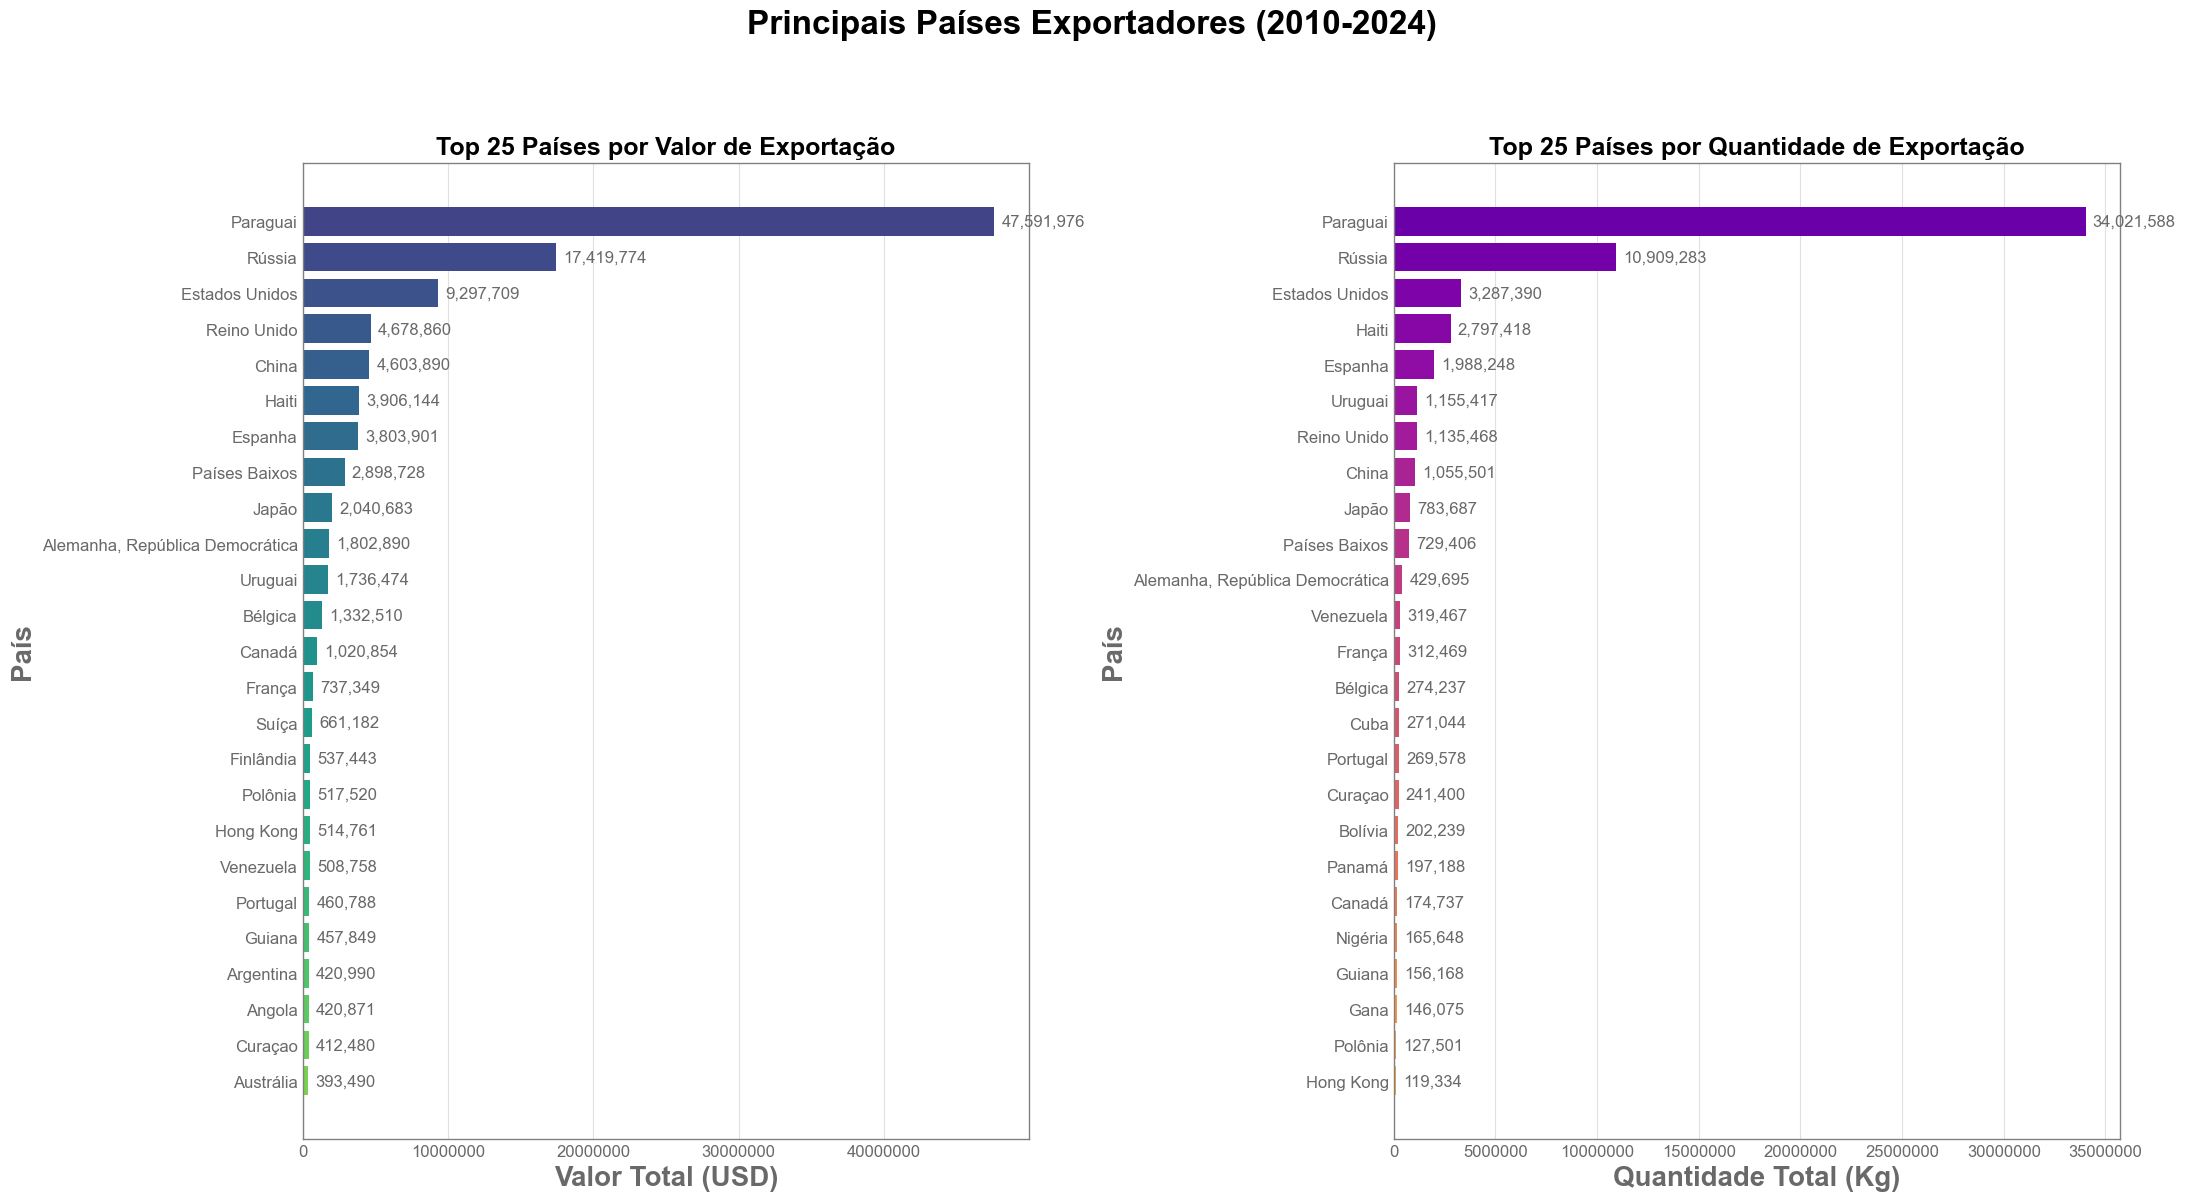

In [ ]:

# Configurações para exibir todas as linhas e colunas (opcional, para depuração)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# --- ASSUMINDO que o DataFrame 'exportacao' JÁ ESTÁ CARREGADO E PRONTO. ---
# As colunas esperadas são: 'País', 'Ano', 'Quantidade (kg)', 'Valor_USD'.

# Assegura que 'Ano', 'Quantidade (kg)' e 'Valor_USD' são numéricos.
exportacao['Ano'] = pd.to_numeric(exportacao['Ano'], errors='coerce')
exportacao['Quantidade (kg)'] = pd.to_numeric(exportacao['Quantidade (kg)'], errors='coerce')
exportacao['Valor_USD'] = pd.to_numeric(exportacao['Valor_USD'], errors='coerce')

# Remove linhas com valores nulos após a conversão.
exportacao.dropna(subset=['Ano', 'Quantidade (kg)', 'Valor_USD', 'País'], inplace=True)
exportacao['Ano'] = exportacao['Ano'].astype(int)

# --- Filtrar pelos últimos 15 anos ---
ano_atual = exportacao['Ano'].max()
ano_inicial = ano_atual - 14

df_recentes = exportacao[exportacao['Ano'] >= ano_inicial].copy()

# --- Agrega os dados por País ---
resumo_pais = df_recentes.groupby('País').agg(
    Valor_Total=('Valor_USD', 'sum'),
    Quantidade_Total_Kg=('Quantidade (kg)', 'sum')
).sort_values(by='Valor_Total', ascending=False).reset_index()

# --- Exibe o resumo agregado e os totais gerais (mantido para verificação dos dados) ---
print("\n--- Resumo da Exportação por País (Últimos 15 Anos) ---")
print(resumo_pais.to_markdown(index=False, numalign="left", stralign="left"))

print(f"\n--- Totais Gerais para os Últimos 15 Anos ({ano_inicial}-{ano_atual}) ---")
valor_total_geral = resumo_pais['Valor_Total'].sum()
quantidade_total_geral = resumo_pais['Quantidade_Total_Kg'].sum()
print(f"Valor Total: {valor_total_geral:,.2f} USD")
print(f"Quantidade Total (Kg): {quantidade_total_geral:,.2f} Kg")

# --- Prepara os dados para os gráficos ---
n_top_paises = 25 # Top 25 países
top_paises_valor = resumo_pais.sort_values(by='Valor_Total', ascending=False).head(n_top_paises)
top_paises_quantidade = resumo_pais.sort_values(by='Quantidade_Total_Kg', ascending=False).head(n_top_paises)


# --- Configurações de estilo do Matplotlib para "fundo BRANCO e cores vibrantes" ---
plt.style.use('seaborn-v0_8-whitegrid') # Fundo branco com grade suave
# plt.rcParams['figure.figsize'] = (16, 10) # Já definido acima ou no inicio do seu script
# plt.rcParams['font.size'] = 12
# plt.rcParams['axes.labelsize'] = 14
# plt.rcParams['axes.titlesize'] = 18

# Ajustar a cor do texto e elementos para ser visível no fundo CLARO
plt.rcParams['text.color'] = 'dimgray' # Texto geral em cinza escuro
plt.rcParams['axes.labelcolor'] = 'dimgray' # Rótulos dos eixos em cinza escuro
plt.rcParams['xtick.color'] = 'dimgray' # Ticks do eixo X em cinza escuro
plt.rcParams['ytick.color'] = 'dimgray' # Ticks do eixo Y em cinza escuro
plt.rcParams['axes.edgecolor'] = 'gray' # Borda dos eixos em cinza
plt.rcParams['grid.color'] = 'lightgray' # Cor da grade (mais suave)
plt.rcParams['grid.linestyle'] = '-' # Estilo da grade (contínua)


# Paletas de cores para fundo CLARO (invertidas ou adequadas)
colors_value_tech = plt.cm.viridis(np.linspace(0.2, 0.8, n_top_paises)) # Tons de azul-verde
colors_quantity_tech = plt.cm.plasma(np.linspace(0.2, 0.8, n_top_paises)) # Tons de roxo-laranja (bom contraste)


formatter_int = mticker.FormatStrFormatter('%.0f') # Formatador para números inteiros

# --- GRÁFICOS 1 E 2: TOP 25 PAÍSES (Lado a Lado) ---
fig1, axes1 = plt.subplots(nrows=1, ncols=2, figsize=(22, 12)) # Aumenta um pouco mais o tamanho
fig1.suptitle(f'Principais Países Exportadores ({ano_inicial}-{ano_atual})',
             fontsize=24, fontweight='bold', color='black', y=1.03) # Título da figura em PRETO

# Gráfico 1.1: Top 25 Países por Valor de Exportação
ax_val = axes1[0]
ax_val.barh(top_paises_valor['País'], top_paises_valor['Valor_Total'], color=colors_value_tech)
ax_val.set_xlabel('Valor Total (USD)', fontsize=20, fontweight='semibold', color='dimgray') # Rótulos em dimgray
ax_val.set_ylabel('País', fontsize=20, fontweight='semibold', color='dimgray') # Rótulos em dimgray
ax_val.set_title(f'Top {n_top_paises} Países por Valor de Exportação', fontsize=18, fontweight='bold', color='black') # Título em PRETO
ax_val.invert_yaxis() 

# Configura ticks e labels
ax_val.tick_params(axis='x', colors='dimgray', labelsize=12) # Ticks em dimgray
ax_val.tick_params(axis='y', colors='dimgray', labelsize=12, length=0) # Ticks em dimgray, length=0 remove os marcadores do eixo Y
ax_val.xaxis.set_major_formatter(formatter_int)
ax_val.grid(axis='y', visible=False) # Remove as linhas de grade horizontais
ax_val.grid(axis='x', linestyle='-', alpha=0.7, color='lightgray') # Grade vertical em cinza claro

# Adiciona rótulos de valor nas barras, com ajuste de posição e tamanho da fonte
for index, value in enumerate(top_paises_valor['Valor_Total']):
    ax_val.text(value + (ax_val.get_xlim()[1] * 0.01), index, f'{value:,.0f}',
                va='center', ha='left', fontsize=12, color='dimgray') # Rótulos dos valores em dimgray


# Gráfico 1.2: Top 25 Países por Quantidade de Exportação
ax_qty = axes1[1]
ax_qty.barh(top_paises_quantidade['País'], top_paises_quantidade['Quantidade_Total_Kg'], color=colors_quantity_tech)
ax_qty.set_xlabel('Quantidade Total (Kg)', fontsize=20, fontweight='semibold', color='dimgray') # Rótulos em dimgray
ax_qty.set_ylabel('País', fontsize=20, fontweight='semibold', color='dimgray') # Rótulos em dimgray
ax_qty.set_title(f'Top {n_top_paises} Países por Quantidade de Exportação', fontsize=18, fontweight='bold', color='black') # Título em PRETO
ax_qty.invert_yaxis() # Maior quantidade no topo

# Configura ticks e labels
ax_qty.tick_params(axis='x', colors='dimgray', labelsize=12) # Ticks em dimgray
ax_qty.tick_params(axis='y', colors='dimgray', labelsize=12, length=0) # Ticks em dimgray, length=0 remove os marcadores do eixo Y
ax_qty.xaxis.set_major_formatter(formatter_int)
ax_qty.grid(axis='y', visible=False) # Remove as linhas de grade horizontais
ax_qty.grid(axis='x', linestyle='-', alpha=0.7, color='lightgray') # Grade vertical em cinza claro

# Adiciona rótulos de quantidade nas barras, com ajuste de posição e tamanho da fonte
for index, value in enumerate(top_paises_quantidade['Quantidade_Total_Kg']):
    ax_qty.text(value + (ax_qty.get_xlim()[1] * 0.01), index, f'{value:,.0f}',
                va='center', ha='left', fontsize=12, color='dimgray') # Rótulos dos valores em dimgray

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Ajusta o layout
plt.show()

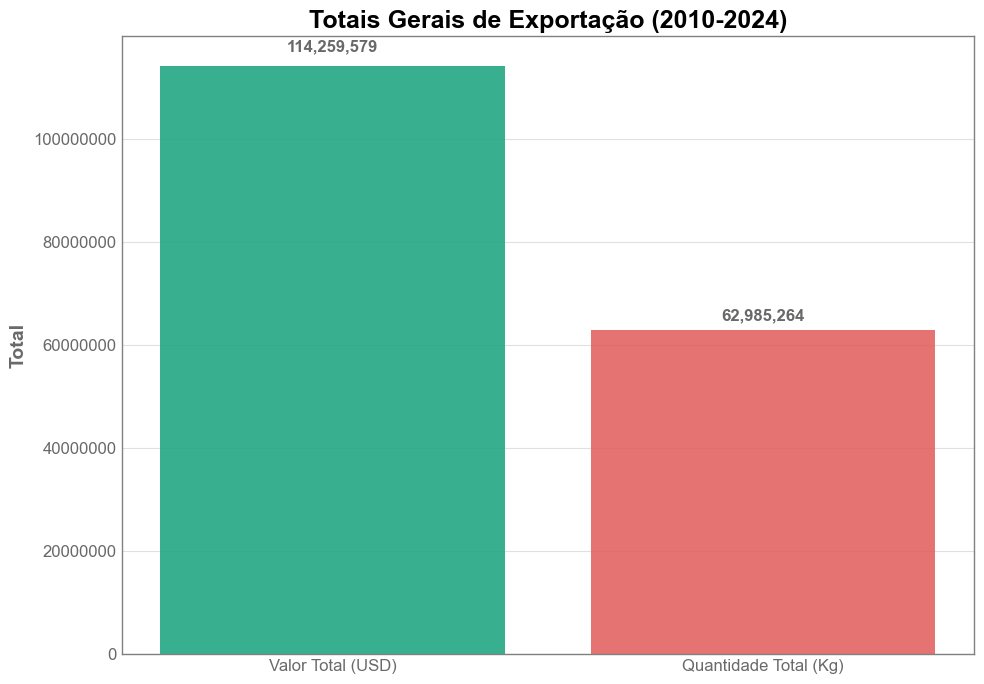

In [100]:

# --- GRÁFICO 3: VALOR TOTAL E QUANTIDADE TOTAL (Mantido como estava, se não houver outra instrução) ---
# Se este gráfico também deve ser branco, as configurações de estilo globais (acima) já o afetarão.
# No entanto, se precisar de ajustes específicos para este único gráfico, eles devem ser feitos AQUI.
# Por exemplo, se quiser cores de barra específicas para o total, ajuste 'colors_for_total_bars'.
fig2, ax2 = plt.subplots(figsize=(10, 7)) # Tamanho para um único gráfico
# ax2.set_facecolor('black') # Não precisa se plt.style.use('seaborn-v0_8-whitegrid') já está ativo.

# Dados para o gráfico de totais
labels = ['Valor Total (USD)', 'Quantidade Total (Kg)']
totals = [valor_total_geral, quantidade_total_geral]

# Definindo as cores para as barras totais com base nas paletas de cores tecnológicas
# Estas cores foram baseadas em paletas para fundo escuro. Para fundo branco, podemos reajustar.
# Exemplo: usar as cores mais escuras das paletas viridis e plasma
color_total_value_light_bg = plt.cm.viridis(0.6) # Ex: um azul-verde mais escuro
color_total_quantity_light_bg = plt.cm.plasma(0.6) # Ex: um roxo mais escuro

colors_for_total_bars_light_bg = [color_total_value_light_bg, color_total_quantity_light_bg]

bars = ax2.bar(labels, totals, color=colors_for_total_bars_light_bg, alpha=0.9) # Usando as novas cores
ax2.set_title(f'Totais Gerais de Exportação ({ano_inicial}-{ano_atual})',
              fontsize=18, fontweight='bold', color='black') # Título em PRETO
ax2.set_ylabel('Total', fontsize=14, fontweight='semibold', color='dimgray') # Rótulo em dimgray
ax2.yaxis.set_major_formatter(formatter_int)
ax2.grid(axis='x', visible=False) # Remove as linhas de grade verticais
ax2.grid(axis='y', linestyle='-', alpha=0.7, color='lightgray') # Mantém a grade horizontal suave

# Configura ticks e labels
ax2.tick_params(axis='x', colors='dimgray', labelsize=12) # Ticks em dimgray
ax2.tick_params(axis='y', colors='dimgray', labelsize=12) # Ticks em dimgray


# Adiciona rótulos de valor nas barras (verticais), com tamanho de fonte maior
for bar in bars:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval + (yval * 0.02), f'{yval:,.0f}',
             ha='center', va='bottom', fontsize=12, color='dimgray', fontweight='bold') # Rótulos dos valores em dimgray

plt.tight_layout()
plt.show()


--- Resumo da Exportação por Ano (Últimos 15 Anos) ---
| Ano   | Valor_Total   | Quantidade_Total_Kg   |
|:------|:--------------|:----------------------|
| 2010  | 2.5953e+06    | 1.28057e+06           |
| 2011  | 3.61512e+06   | 1.21483e+06           |
| 2012  | 5.52129e+06   | 5.77538e+06           |
| 2013  | 2.27448e+07   | 9.14906e+06           |
| 2014  | 7.4728e+06    | 2.32403e+06           |
| 2015  | 2.76916e+06   | 1.19848e+06           |
| 2016  | 4.4347e+06    | 1.78655e+06           |
| 2017  | 7.13561e+06   | 2.88957e+06           |
| 2018  | 7.48606e+06   | 3.85616e+06           |
| 2019  | 5.93483e+06   | 3.15287e+06           |
| 2020  | 6.07829e+06   | 4.40972e+06           |
| 2021  | 9.85194e+06   | 8.0587e+06            |
| 2022  | 1.09453e+07   | 7.02598e+06           |
| 2023  | 8.92308e+06   | 5.53889e+06           |
| 2024  | 8.75128e+06   | 5.32446e+06           |


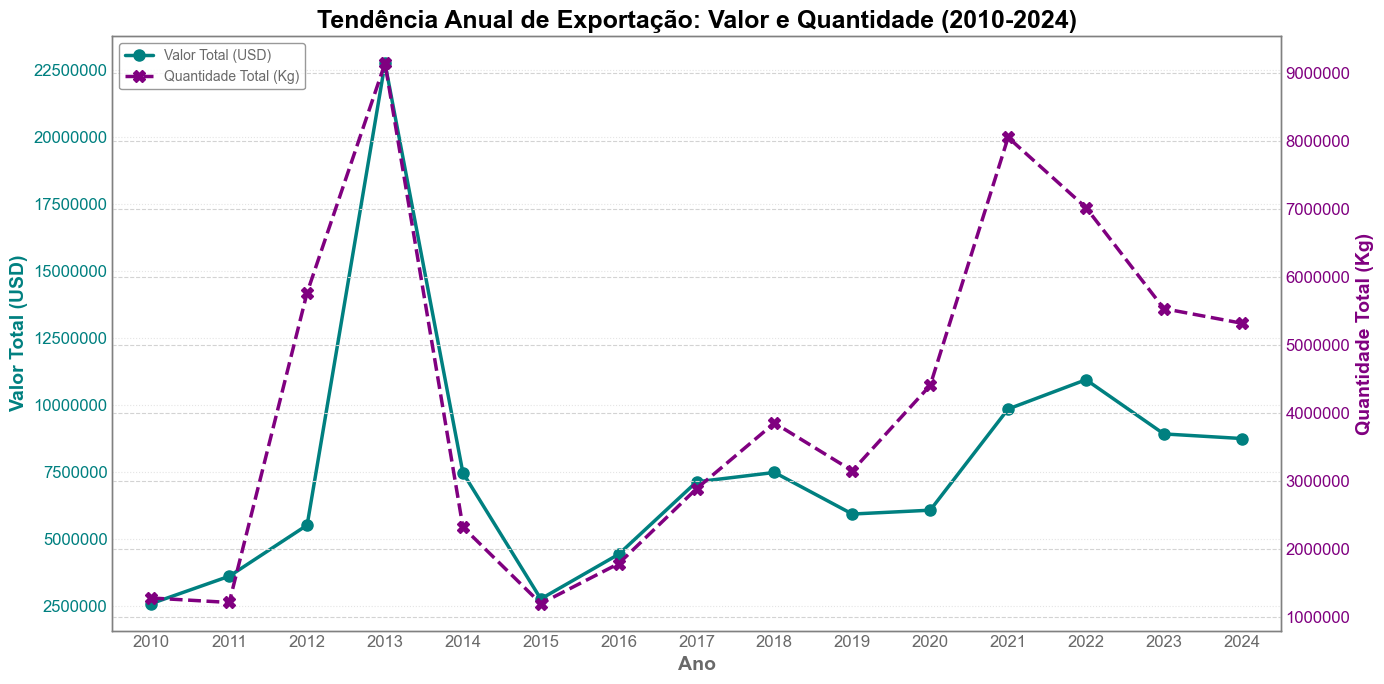

In [101]:


# Configurações para exibir todas as linhas e colunas (opcional, para depuração)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# --- ASSUMINDO que o DataFrame 'exportacao' JÁ ESTÁ CARREGADO E PRONTO. ---
# As colunas esperadas são: 'País', 'Ano', 'Quantidade (kg)', 'Valor_USD'.

# Assegura que 'Ano', 'Quantidade (kg)' e 'Valor_USD' são numéricos.
exportacao['Ano'] = pd.to_numeric(exportacao['Ano'], errors='coerce')
exportacao['Quantidade (kg)'] = pd.to_numeric(exportacao['Quantidade (kg)'], errors='coerce')
exportacao['Valor_USD'] = pd.to_numeric(exportacao['Valor_USD'], errors='coerce')

# Remove linhas com valores nulos após a conversão.
exportacao.dropna(subset=['Ano', 'Quantidade (kg)', 'Valor_USD', 'País'], inplace=True)
exportacao['Ano'] = exportacao['Ano'].astype(int)

# --- Filtrar pelos últimos 15 anos ---
ano_atual = exportacao['Ano'].max()
ano_inicial = ano_atual - 14

df_recentes = exportacao[exportacao['Ano'] >= ano_inicial].copy()

# --- Agrega os dados por Ano ---
resumo_anual = df_recentes.groupby('Ano').agg(
    Valor_Total=('Valor_USD', 'sum'),
    Quantidade_Total_Kg=('Quantidade (kg)', 'sum')
).reset_index()

# Ordena por ano para garantir que a linha do tempo esteja correta
resumo_anual = resumo_anual.sort_values(by='Ano')

# --- Exibe o resumo agregado por ano (para verificação dos dados) ---
print("\n--- Resumo da Exportação por Ano (Últimos 15 Anos) ---")
print(resumo_anual.to_markdown(index=False, numalign="left", stralign="left"))


# --- Configurações de estilo do Matplotlib para "fundo BRANCO e cores vibrantes" ---
plt.style.use('seaborn-v0_8-whitegrid') # Fundo branco com grade suave
# Ajustar as cores de texto e elementos para serem visíveis no fundo CLARO
plt.rcParams.update({
    'text.color': 'dimgray', # Cor padrão do texto
    'axes.labelcolor': 'dimgray', # Cor dos rótulos dos eixos
    'xtick.color': 'dimgray', # Cor dos ticks do eixo X
    'ytick.color': 'dimgray', # Cor dos ticks do eixo Y
    'axes.edgecolor': 'gray', # Borda dos eixos
    'grid.color': 'lightgray', # Cor da grade
    'grid.linestyle': '--', # Estilo da grade
    'figure.figsize': (14, 7), # Tamanho da figura (mantido para este gráfico específico)
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 18,
})


# Cores vibrantes (ajustadas para fundo claro se necessário, mas as atuais ainda podem funcionar bem)
color_value_line = '#008080'  # Teal (um ciano mais escuro)
color_quantity_line = '#800080' # Purple (um magenta mais escuro)
# Ou manter as originais vibrantes:
# color_value_line = '#00FFFF' # Ciano elétrico
# color_quantity_line = '#FF00FF' # Magenta vibrante


formatter_int = mticker.FormatStrFormatter('%.0f') # Formatador para números inteiros

# --- GRÁFICO TEMPORAL: VALOR E QUANTIDADE AO LONGO DO TEMPO ---
fig, ax1 = plt.subplots(figsize=(14, 7)) # Tamanho da figura

# Configurações para o eixo Y de Valor (esquerda)
ax1.set_xlabel('Ano', fontsize=14, fontweight='semibold', color='dimgray') # Cor ajustada
ax1.set_ylabel('Valor Total (USD)', color=color_value_line, fontsize=14, fontweight='semibold')
ax1.plot(resumo_anual['Ano'], resumo_anual['Valor_Total'], color=color_value_line,
         marker='o', linestyle='-', linewidth=2.5, markersize=8, label='Valor Total (USD)')
ax1.tick_params(axis='y', labelcolor=color_value_line, labelsize=12)
ax1.tick_params(axis='x', colors='dimgray', labelsize=12) # Cor ajustada
ax1.set_title(f'Tendência Anual de Exportação: Valor e Quantidade ({ano_inicial}-{ano_atual})',
              fontsize=18, fontweight='bold', color='black') # Cor do título ajustada

# Formatação do eixo Y de valor
ax1.yaxis.set_major_formatter(formatter_int)
ax1.grid(axis='y', linestyle=':', alpha=0.6, color='lightgray') # Grade horizontal mais suave e pontilhada
ax1.grid(axis='x', visible=False) # Remove grade vertical

# Criar um segundo eixo Y para a Quantidade (direita)
ax2 = ax1.twinx()
ax2.set_ylabel('Quantidade Total (Kg)', color=color_quantity_line, fontsize=14, fontweight='semibold')
ax2.plot(resumo_anual['Ano'], resumo_anual['Quantidade_Total_Kg'], color=color_quantity_line,
         marker='X', linestyle='--', linewidth=2.5, markersize=8, label='Quantidade Total (Kg)')
ax2.tick_params(axis='y', labelcolor=color_quantity_line, labelsize=12)

# Formatação do eixo Y de quantidade
ax2.yaxis.set_major_formatter(formatter_int)

# Configurar ticks do eixo X para mostrar todos os anos, se houver muitos, ou apenas alguns para clareza
if len(resumo_anual['Ano']) > 15: # Se mais de 15 anos, mostra a cada 2 anos
    ax1.set_xticks(resumo_anual['Ano'].iloc[::2])
else: # Se 15 anos ou menos, mostra todos
    ax1.set_xticks(resumo_anual['Ano'])

ax1.set_xlim(resumo_anual['Ano'].min() - 0.5, resumo_anual['Ano'].max() + 0.5) # Garante que os pontos de dados não fiquem na borda

# Adicionar legenda combinada para ambos os eixos
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', frameon=True,
           fontsize=10, facecolor='white', edgecolor='gray', labelcolor='dimgray') # Fundo branco, borda cinza, texto dimgray

plt.tight_layout() # Ajusta o layout
plt.show()


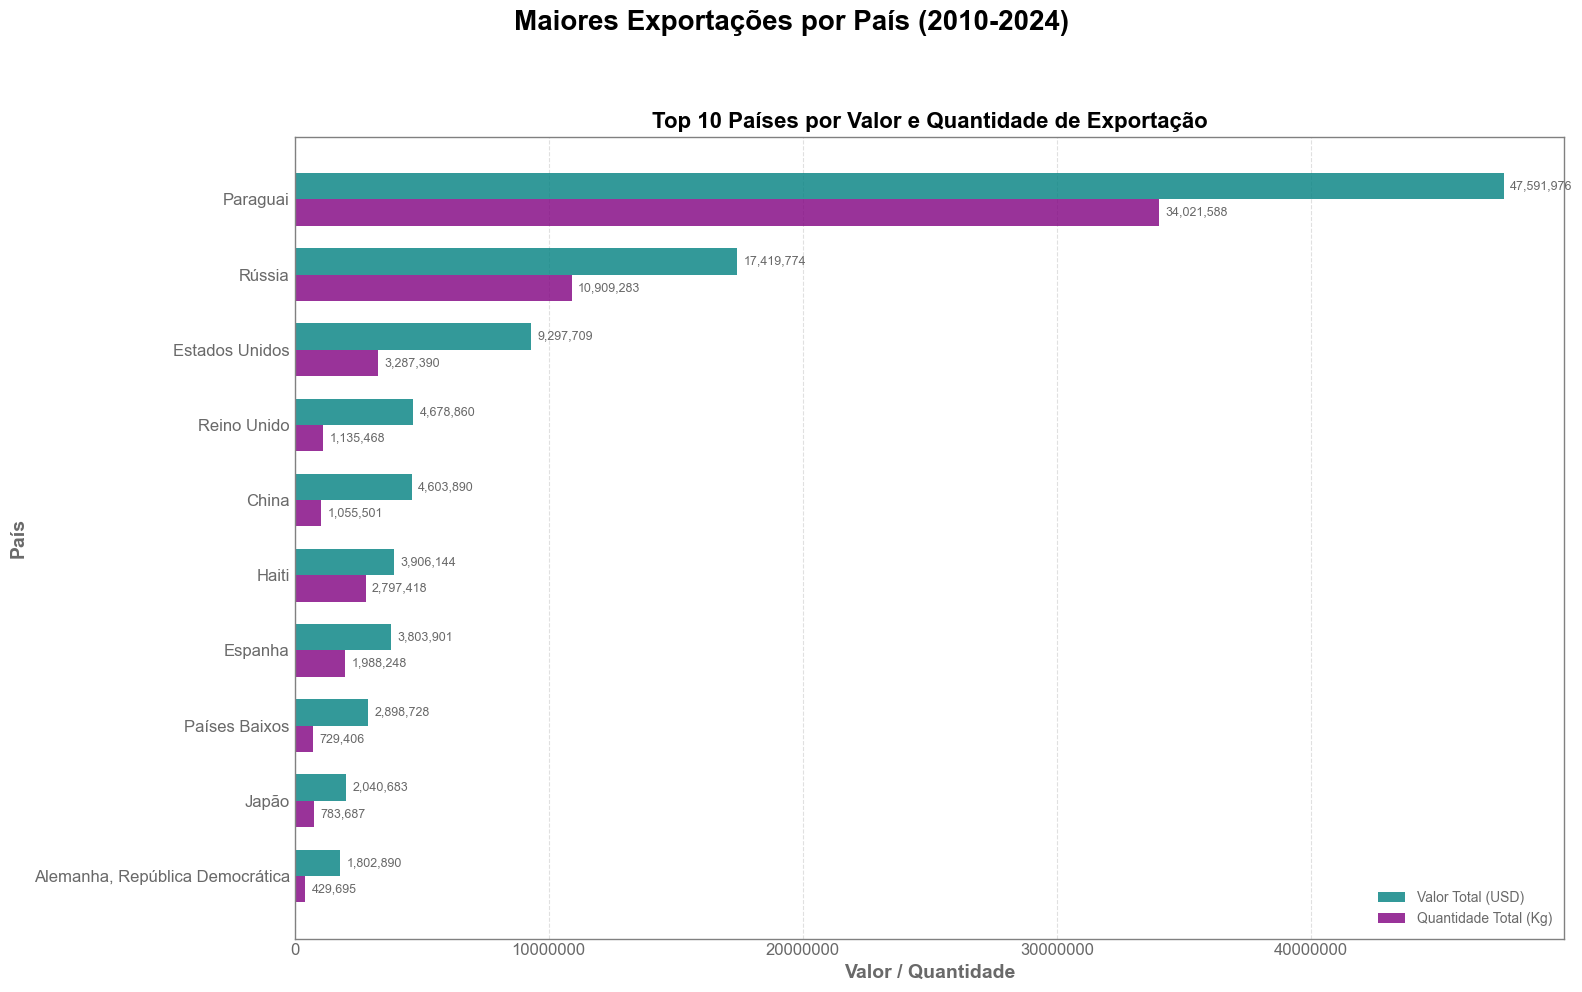

In [102]:
# Configurações para exibir todas as linhas e colunas (opcional, para depuração)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format) # Formata números float com 2 casas decimais e separador de milhares

# --- ASSUMINDO que o DataFrame 'exportacao' JÁ ESTÁ CARREGADO E PRONTO. ---
# As colunas esperadas são: 'País', 'Ano', 'Quantidade (kg)', 'Valor_USD'.

# Assegura que 'Ano', 'Quantidade (kg)' e 'Valor_USD' são numéricos.
exportacao['Ano'] = pd.to_numeric(exportacao['Ano'], errors='coerce')
exportacao['Quantidade (kg)'] = pd.to_numeric(exportacao['Quantidade (kg)'], errors='coerce')
exportacao['Valor_USD'] = pd.to_numeric(exportacao['Valor_USD'], errors='coerce')

# Remove linhas com valores nulos após a conversão.
exportacao.dropna(subset=['Ano', 'Quantidade (kg)', 'Valor_USD', 'País'], inplace=True)
exportacao['Ano'] = exportacao['Ano'].astype(int)

# --- Filtrar pelos últimos 15 anos ---
ano_atual = exportacao['Ano'].max()
ano_inicial = ano_atual - 14

df_recentes = exportacao[exportacao['Ano'] >= ano_inicial].copy()

# --- Agrega os dados por País ---
resumo_pais = df_recentes.groupby('País').agg(
    Valor_Total=('Valor_USD', 'sum'),
    Quantidade_Total_Kg=('Quantidade (kg)', 'sum')
).sort_values(by='Valor_Total', ascending=False).reset_index() # Ordena por Valor_Total para pegar os top países

# --- Prepara os dados para o gráfico de maiores exportações ---
n_top_paises_graph = 10 # Número de países para exibir no gráfico
top_paises_para_graph = resumo_pais.head(n_top_paises_graph).copy()

# --- Configurações de estilo do Matplotlib para "fundo BRANCO e cores vibrantes" ---
# Usar 'seaborn-v0_8-whitegrid' para um fundo branco com grade suave.
plt.style.use('seaborn-v0_8-whitegrid') 

# Ajustar a cor do texto e elementos para ser visível no fundo CLARO
plt.rcParams['text.color'] = 'dimgray' # Texto geral em cinza escuro
plt.rcParams['axes.labelcolor'] = 'dimgray' # Rótulos dos eixos em cinza escuro
plt.rcParams['xtick.color'] = 'dimgray' # Ticks do eixo X em cinza escuro
plt.rcParams['ytick.color'] = 'dimgray' # Ticks do eixo Y em cinza escuro
plt.rcParams['axes.edgecolor'] = 'gray' # Borda dos eixos em cinza
plt.rcParams['grid.color'] = 'lightgray' # Cor da grade (mais suave)
plt.rcParams['grid.linestyle'] = '-' # Estilo da grade (contínua)

# Paletas de cores para fundo CLARO (ajustadas)
# Viridis e Plasma são boas, mas para fundo branco, as cores iniciais são claras.
# Podemos pegar cores um pouco mais escuras das paletas ou usar outras.
# Vou usar as mesmas cores do gráfico temporal para consistência com o estilo "tecnológico" em fundo branco.
color_valor = '#008080'  # Teal (um ciano mais escuro)
color_quantidade = '#800080' # Purple (um magenta mais escuro)

formatter_int = mticker.FormatStrFormatter('%.0f') # Formata números como inteiros

# --- GRÁFICO COMBINADO: MAIORES EXPORTAÇÕES (Valor e Quantidade) ---
fig, ax = plt.subplots(figsize=(16, 10)) # Tamanho da figura para o gráfico combinado
fig.suptitle(f'Maiores Exportações por País ({ano_inicial}-{ano_atual})',
             fontsize=20, fontweight='bold', color='black', y=1.02) # Título da figura em PRETO

# Definir a largura das barras e o espaçamento para barras agrupadas
bar_height = 0.35
r1 = np.arange(len(top_paises_para_graph['País']))
r2 = [x + bar_height for x in r1]

# Barras para Valor Total (USD)
bars_valor = ax.barh(r1, top_paises_para_graph['Valor_Total'], height=bar_height,
                     color=color_valor, label='Valor Total (USD)', alpha=0.8)

# Barras para Quantidade Total (Kg)
bars_quantidade = ax.barh(r2, top_paises_para_graph['Quantidade_Total_Kg'], height=bar_height,
                          color=color_quantidade, label='Quantidade Total (Kg)', alpha=0.8)

ax.set_xlabel('Valor / Quantidade', fontsize=14, fontweight='semibold', color='dimgray') # Rótulos em dimgray
ax.set_ylabel('País', fontsize=14, fontweight='semibold', color='dimgray') # Rótulos em dimgray
ax.set_title(f'Top {n_top_paises_graph} Países por Valor e Quantidade de Exportação',
             fontsize=16, fontweight='bold', color='black') # Título em PRETO

# Configurar rótulos do eixo Y (nomes dos países)
ax.set_yticks([r + bar_height/2 for r in r1])
ax.set_yticklabels(top_paises_para_graph['País'], fontsize=12, color='dimgray') # Rótulos dos países em dimgray
ax.invert_yaxis() # Maior valor no topo

# Configura ticks do eixo X
ax.tick_params(axis='x', colors='dimgray', labelsize=12) # Ticks em dimgray
ax.tick_params(axis='y', length=0) # Remove os marcadores do eixo Y

ax.xaxis.set_major_formatter(formatter_int) # Formata números como inteiros

# Adiciona rótulos de valor nas barras
for bar in bars_valor:
    width = bar.get_width()
    ax.text(width + (ax.get_xlim()[1] * 0.005), bar.get_y() + bar.get_height()/2,
            f'{width:,.0f}', va='center', ha='left', fontsize=9, color='dimgray') # Rótulos dos valores em dimgray

for bar in bars_quantidade:
    width = bar.get_width()
    ax.text(width + (ax.get_xlim()[1] * 0.005), bar.get_y() + bar.get_height()/2,
            f'{width:,.0f}', va='center', ha='left', fontsize=9, color='dimgray') # Rótulos dos valores em dimgray

ax.legend(fontsize=10, facecolor='white', edgecolor='gray', labelcolor='dimgray') # Legenda em dimgray
ax.grid(axis='x', linestyle='--', alpha=0.7, color='lightgray') # Grade horizontal em cinza claro
ax.grid(axis='y', visible=False) # Remove linhas de grade verticais para não cortar os nomes

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Ajusta o layout
plt.show()

# --- Totais Gerais (apenas para referência, em formato de tabela) ---
# Se você quiser exibir esta tabela também:
# print(f"\n--- Totais Gerais de Exportação ({ano_inicial}-{ano_atual}) ---")
# valor_total_geral = resumo_pais['Valor_Total'].sum()
# quantidade_total_geral = resumo_pais['Quantidade_Total_Kg'].sum()
# print(f"Valor Total Geral: {valor_total_geral:,.2f} USD")
# print(f"Quantidade Total Geral: {quantidade_total_geral:,.2f} Kg")
